<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/bigdataminning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# Load file Excel
file_path = 'jersy_jude_bellingham.xlsx'
df = pd.read_excel(file_path)

# Tampilkan 5 data teratas
print(df.head())


                                               title   price           sell  \
0  Jersey Lengan Panjang Real.Madriid Home New Te...  129.00    269 Terjual   
1  JUDE BELLINGHAM FOOTBALL BOXY OVERSIZED/REGULA...  132.80     33 Terjual   
2  JERSEY REAL MADRID FANS VERSION FULL PRINTING ...   77.76    895 Terjual   
3  Bisa COD Baju Bola Dewasa Madrid Club Vini JR ...   20.00  7,1RB Terjual   
4  Campeones - Tshirt - Football Starboy Jude Bel...  169.00     12 Terjual   

              addres  
0  Tangerang Selatan  
1        Kab. Kediri  
2      Kab. Wonosobo  
3                NaN  
4       Kab. Bandung  


In [4]:
# Fungsi untuk membersihkan kolom 'sell'
def clean_sell(value):
    if pd.isnull(value):
        return np.nan
    value = value.replace(' Terjual', '').replace('.', '')
    if 'RB' in value:
        value = value.replace('RB', '').replace(',', '.')
    # Handle values like '10+' by extracting the numeric part
    value = value.replace('+', '')
    try:
        return float(value) * 1000 if 'RB' in value else float(value) # Multiply by 1000 if 'RB' was present
    except ValueError:
        return np.nan

In [7]:
# Apply the clean_sell function to create the 'sell_clean' column
df['sell_clean'] = df['sell'].apply(clean_sell) # This line is added to create the 'sell_clean' column

# Menghapus baris dengan nilai NaN di kolom 'sell_clean'
df_clean = df.dropna(subset=['sell_clean'])

# Reset index
df_clean = df_clean.reset_index(drop=True)

print(f"Data setelah dibersihkan: {df_clean.shape}")


Data setelah dibersihkan: (171, 5)


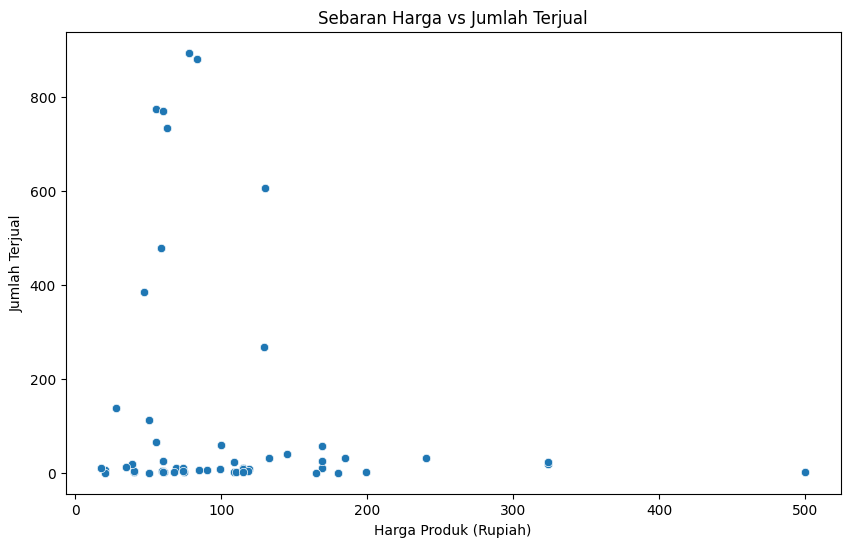

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='price', y='sell_clean')
plt.title('Sebaran Harga vs Jumlah Terjual')
plt.xlabel('Harga Produk (Rupiah)')
plt.ylabel('Jumlah Terjual')
plt.show()


In [9]:
# Ambil fitur yang akan dianalisis
X = df_clean[['price', 'sell_clean']]

# Inisialisasi dan latih KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# Tampilkan pusat cluster
print("Pusat Cluster:\n", kmeans.cluster_centers_)


Pusat Cluster:
 [[ 75.75989474  24.96052632]
 [ 71.79575    691.125     ]
 [238.54536364  19.10909091]]


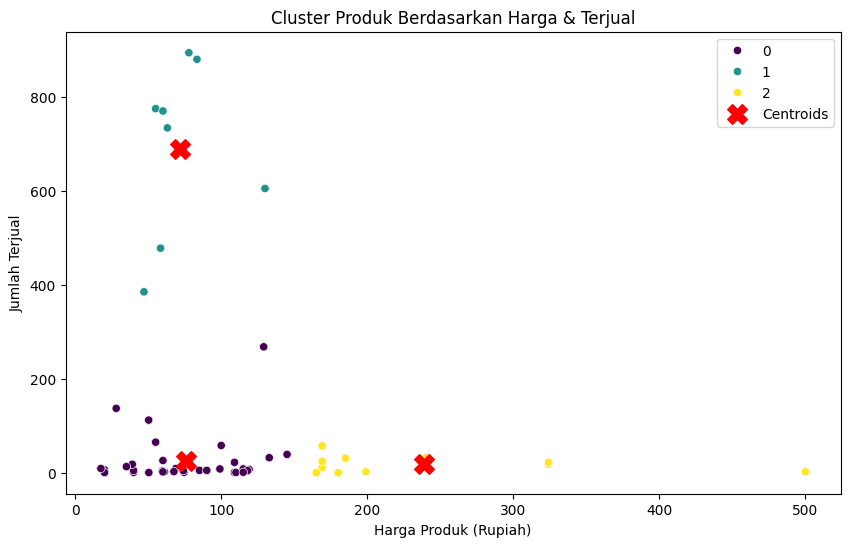

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='price', y='sell_clean', hue='cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Cluster Produk Berdasarkan Harga & Terjual')
plt.xlabel('Harga Produk (Rupiah)')
plt.ylabel('Jumlah Terjual')
plt.legend()
plt.show()
